# Decision Tree Classifier on Social Network Ads

In [1]:
#IMPORT LIBRARIES
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#READ DATASET
sn=pd.read_csv(r'Social_Network_Ads.csv')

In [3]:
sn.shape

(400, 5)

In [4]:
sn.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
sn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
sn=sn.drop([ "User ID"], axis=1)

In [7]:
sn.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
#CONVERT OBJECT TYPE TO NUMERIC
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
sn[sn.select_dtypes(include=['object']).columns]= sn[sn.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [11]:
sn.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [12]:
#SAMPLING
from sklearn.model_selection import train_test_split

In [13]:
sn_train, sn_test = train_test_split(sn, test_size=.20)

In [20]:
sn_train_x = sn_train.iloc[:, 0:-1]
sn_train_y = sn_train.iloc[:, -1]

In [21]:
sn_test_x = sn_test.iloc[:, 0:-1]
sn_test_y = sn_test.iloc[: , -1]

In [22]:
#MODEL BUILDING (LOGISTIC REGRESSION)
from sklearn.linear_model import LogisticRegression

In [23]:
logi_reg=LogisticRegression()

In [24]:
logi_reg.fit(sn_train_x , sn_train_y)

LogisticRegression()

In [25]:
#PREDICTION
pred= logi_reg.predict(sn_test_x)

In [26]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
#EVALUATION PARAMETERS
from sklearn.metrics import confusion_matrix

In [28]:
cm=confusion_matrix(sn_test_y, pred)

In [29]:
cm

array([[52,  0],
       [28,  0]], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(sn_test_y, pred)*100

65.0

In [32]:
from sklearn.metrics import recall_score

In [33]:
recall_score(sn_test_y, pred)*100

0.0

In [34]:
from sklearn.metrics import precision_score

In [35]:
precision_score(sn_test_y, pred)*100

C:\Users\Janhavi Gadge\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [36]:
from sklearn.metrics import f1_score

In [37]:
f1_score(sn_test_y, pred)*100

0.0

In [87]:
pred_proba= logi_reg.predict_proba(sn_test_x)


In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [41]:
roc_auc_score(sn_test_y, pred )*100

50.0

In [42]:
pred_proba[:, 1]

array([0.42235023, 0.48342064, 0.45698448, 0.47944565, 0.47481148,
       0.44450258, 0.45961969, 0.424942  , 0.44712506, 0.48474613,
       0.41717962, 0.47745909, 0.41782496, 0.44188316, 0.44778116,
       0.46093814, 0.44778115, 0.45961969, 0.43665417, 0.44450257,
       0.48342064, 0.4236456 , 0.44122882, 0.46687772, 0.48474612,
       0.46489673, 0.46225715, 0.45237875, 0.47282668, 0.47150396,
       0.46027885, 0.45830179, 0.45040731, 0.43143924, 0.48342065,
       0.44712507, 0.43992072, 0.48077037, 0.45698448, 0.46687772,
       0.42170294, 0.44581345, 0.42948749, 0.47150397, 0.42299778,
       0.47150397, 0.45830179, 0.44975051, 0.4781212 , 0.40881654,
       0.48673476, 0.46687772, 0.45172143, 0.46357669, 0.44122881,
       0.47944565, 0.46093815, 0.4787834 , 0.45106429, 0.43078841,
       0.40945805, 0.41009988, 0.42623946, 0.44319247, 0.44712506,
       0.45961969, 0.47084276, 0.42623945, 0.48540895, 0.4255906 ,
       0.45106428, 0.48872381, 0.44253771, 0.45435168, 0.45698

In [60]:
fpr, tpr, ther= roc_curve(sn_test_y, pred_proba[:,1] )

In [61]:
import matplotlib.pyplot as plt

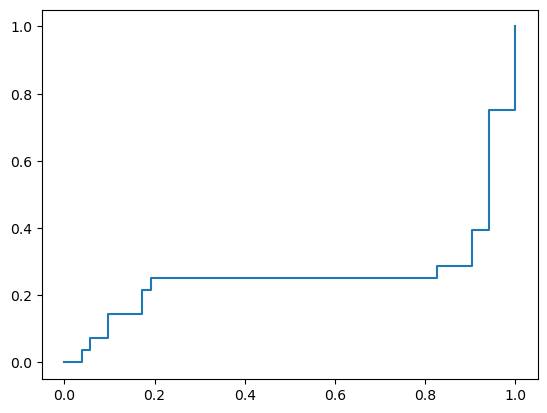

In [62]:
plt.plot(fpr, tpr)

##### here in this dataset logistic regression model is not performing well so we will chek it for decision tree

In [64]:
#MODEL BUILDING (DECISION TREE)
from sklearn.tree import DecisionTreeClassifier

In [88]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=20, min_samples_split=5 )

In [89]:
dt.fit(sn_train_x, sn_train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=5)

In [90]:
dt_pred= dt.predict(sn_test_x)
dt_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [91]:
confusion_matrix(sn_test_y, dt_pred )

array([[50,  2],
       [ 7, 21]], dtype=int64)

In [92]:
accuracy_score(sn_test_y, dt_pred)*100

88.75

#### decision tree model is performing good for this dataset